In [47]:
import os
import tarfile
from six.moves import urllib
os.getcwd()

'C:\\Users\\Dennis\\Documents\\Data science course\\Carlifonia housing Project'

In [48]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
        
fetch_housing_data()


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [49]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [50]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
# Finding out what category exists and how many districts  belongs to each category
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [53]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


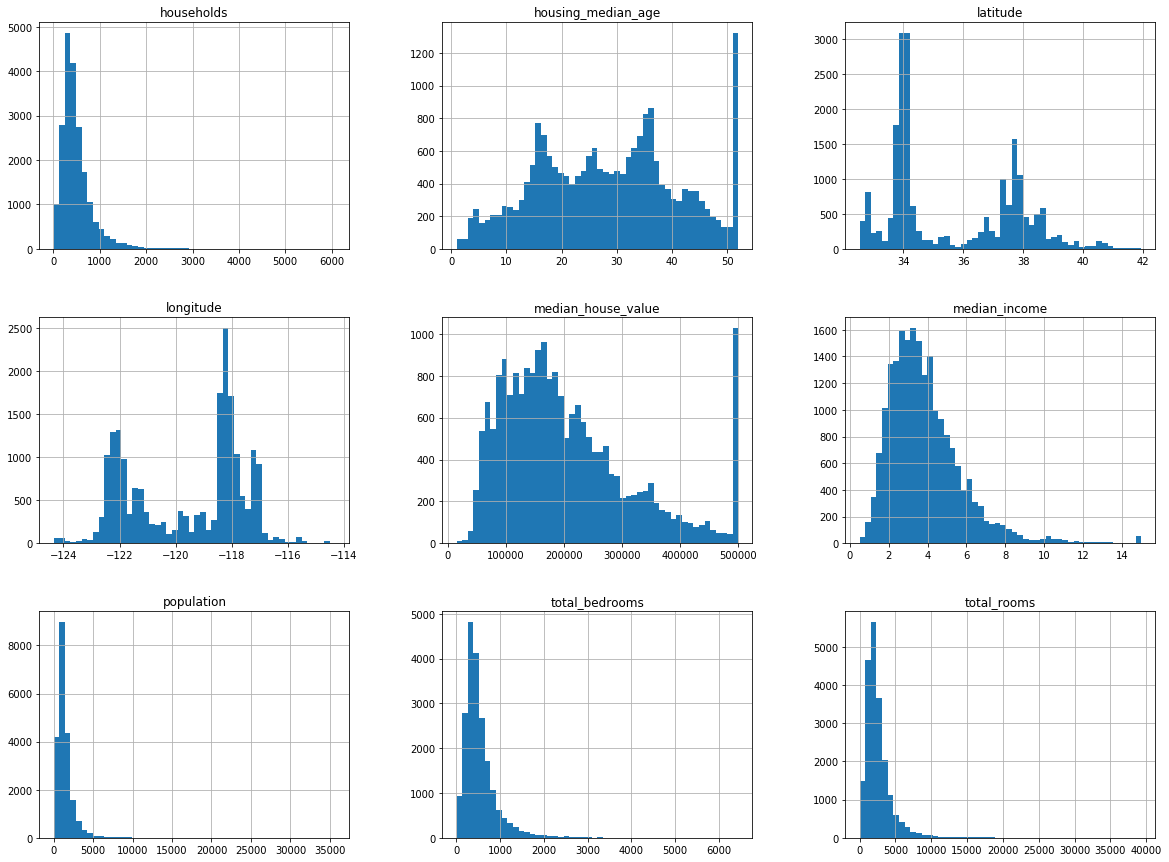

In [54]:
# Plotting a histogram fo each numerical value
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size=0.2,random_state=42)

In [56]:
housing = train_set.copy()

In [57]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [58]:
##### Visualizing Geographical data

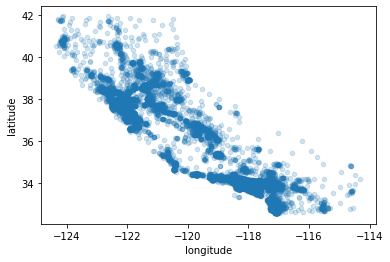

In [59]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2)

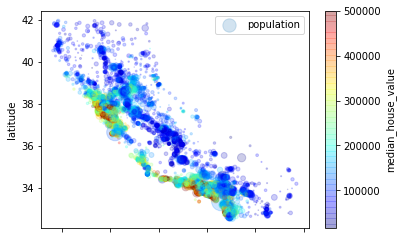

In [60]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2,
            s=housing["population"]/100, label="population", c="median_house_value",
            cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

##### Looking for correlations

In [61]:
corr_matrix = housing.corr()

In [62]:
corr_matrix["median_house_value"]

longitude            -0.046349
latitude             -0.142983
housing_median_age    0.103706
total_rooms           0.133989
total_bedrooms        0.047980
population           -0.026032
households            0.063714
median_income         0.690647
median_house_value    1.000000
Name: median_house_value, dtype: float64

#### Anothter way of checking correlation is using pandas

In [63]:
housing.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [64]:
from pandas.plotting import scatter_matrix
attributes = ['housing_median_age', 'total_rooms','total_bedrooms','median_house_value']
scatter_matrix(housing['attributes'],figsize=(12,8))

KeyError: 'attributes'

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


#### Experimenting with attributes combination

In [ ]:
housing['rooms_per_house_hold']= housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

In [115]:
housing = train_set.drop("median_house_value",axis=1)
housing_labels = train_set['median_house_value'].copy()

### Data cleaning

##### Scikit learn provides a handy class to take care of missing values: Imputer

In [116]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [117]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [118]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [119]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [120]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [121]:
X= imputer.transform(housing_num)

In [122]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [123]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
16507,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
16508,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
16509,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
16510,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [124]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


#### Handling text and categoricaal attributes

##### We can transform text labels to numbers

In [125]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 4, 4, ..., 0, 0, 3])

In [126]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [127]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

C:\Users\Dennis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [128]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the LabelBinarizer class:

In [129]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

#### Custom Transformers 

In [130]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix,population_ix,household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True): #no *Args or *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self,X,y=None):
        rooms_per_household = X[:, population_ix]/X[:, household_ix]
        population_per_household = X[:,population_ix]/ X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_househld]
        attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
        housing_extra_attribs = attr_adder.transform(housing.values)

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('atrribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [132]:
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        enc = LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [134]:
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('atrribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [135]:
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',CustomLabelBinarizer()),
])

In [136]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
])

In [137]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [138]:
housing_prepared.shape

(16512, 16)

#### Select and Train model

In [139]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
some_data = housing.iloc[:5]

some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
some_data_prepared.shape

(5, 12)

In [160]:

## we concatinate zeroes to some_data_prepared becaues the columns of some_data_prepared and housing_prepared are not the same
dummy_array = np.zeros((5,4))
some_data_prepared = np.c_[some_data_prepared, dummy_array]

predictions = lin_reg.predict(some_data_prepared)
print("Predictions: ", predictions)
print("Labels: ", some_labels.values)

Predictions:  [155130.52403166 374016.52490336 310204.19537057  42851.13675404
 230014.72462669]
Labels:  [103000. 382100. 172600.  93400.  96500.]


#### Lets measure the regression model RMSE

In [163]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

67839.07351617553

In [169]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross validation using K Fold

#### Cross validationfor Decision trees

In [182]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [183]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard deviation",scores.std())

In [184]:
display_scores(tree_rmse_scores)

Scores [68458.12462399 73810.9176672  66886.81752584 74376.1384532
 72073.24471531 69835.25075154 65605.43008481 69981.98177752
 68062.65027705 69231.40344215]
Mean 69832.1959318615
Standard deviation 2710.046197864487


#### Cross validation for linear regression

In [185]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv = 10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [65105.38571953 71239.95991342 67362.1138993  66078.85736923
 68591.73337458 65290.13810247 65222.04661262 69699.19120984
 73110.43891812 69024.41543549]
Mean 68072.42805545991
Standard deviation 2615.055451171683


#### Cross validation for RandomForestGenerator

In [191]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

C:\Users\Dennis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [192]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv = 10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [50071.50718559 53884.55643184 52255.15928865 54983.05811067
 55205.16896102 50340.197829   50870.49371702 55216.47939744
 53135.46848197 52078.89549488]
Mean 52804.09848980708
Standard deviation 1889.8075104835061


#### Saving model using joblib

In [196]:
from sklearn.externals import joblib
joblib.dump(forest_scores,'forest_scores.pkl')

#forest_scores = joblib.load("forest_scores.pkl")


['forest_scores.pkl']

## Fine tuning model

### Grid search

In [204]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [205]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [206]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [207]:
cvres= grid_search.cv_results_
for men_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score),params)

NameError: name 'mean_score' is not defined

In [208]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.72059146e-02, 6.18615954e-02, 4.21563532e-02, 1.62738162e-02,
       1.54331890e-02, 1.53621585e-02, 1.51805142e-02, 3.62428189e-01,
       7.21459049e-02, 6.29415505e-02, 9.36220223e-02, 1.34953568e-02,
       1.55644498e-01, 3.37694864e-04, 2.08532142e-03, 3.82592124e-03])

In [209]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3624281887892357, 'median_income'),
 (0.155644498038067, 'INLAND'),
 (0.09362202225146989, 'bedrooms_per_room'),
 (0.07214590488447631, 'rooms_per_hhold'),
 (0.06720591463276589, 'longitude'),
 (0.06294155046803045, 'pop_per_hhold'),
 (0.06186159540109137, 'latitude'),
 (0.04215635323637918, 'housing_median_age'),
 (0.016273816247472227, 'total_rooms'),
 (0.015433189004427852, 'total_bedrooms'),
 (0.015362158453904635, 'population'),
 (0.015180514246405534, 'households'),
 (0.013495356827081072, '<1H OCEAN'),
 (0.0038259212359484595, 'NEAR OCEAN'),
 (0.0020853214192788115, 'NEAR BAY'),
 (0.00033769486396566624, 'ISLAND')]